In [7]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [9]:
#Carga de dataset
data = pd.read_csv('/content/wfp_food_prices_ind.csv')

In [10]:
print(data)

              date       admin1          admin2     market   latitude  \
0       15/01/1994        Delhi           Delhi      Delhi  28.666667   
1       15/01/1994        Delhi           Delhi      Delhi  28.666667   
2       15/01/1994        Delhi           Delhi      Delhi  28.666667   
3       15/01/1994        Delhi           Delhi      Delhi  28.666667   
4       15/01/1994      Gujarat       Ahmadabad  Ahmedabad  23.033333   
...            ...          ...             ...        ...        ...   
172012  15/07/2022  West Bengal  West Midnapore  Kharagpur  22.339330   
172013  15/07/2022  West Bengal  West Midnapore  Kharagpur  22.339330   
172014  15/07/2022  West Bengal  West Midnapore  Kharagpur  22.339330   
172015  15/07/2022  West Bengal  West Midnapore  Kharagpur  22.339330   
172016  15/07/2022  West Bengal  West Midnapore  Kharagpur  22.339330   

        longitude               category        commodity unit priceflag  \
0       77.216667     cereals and tubers       

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172017 entries, 0 to 172016
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       172017 non-null  object 
 1   admin1     171228 non-null  object 
 2   admin2     171228 non-null  object 
 3   market     172017 non-null  object 
 4   latitude   171228 non-null  float64
 5   longitude  171228 non-null  float64
 6   category   172017 non-null  object 
 7   commodity  172017 non-null  object 
 8   unit       172017 non-null  object 
 9   priceflag  172017 non-null  object 
 10  pricetype  172017 non-null  object 
 11  currency   172017 non-null  object 
 12  price      172017 non-null  float64
 13  usdprice   172017 non-null  float64
dtypes: float64(4), object(10)
memory usage: 18.4+ MB


In [37]:
#eliminar columnas
columna_eliminar = ['pricetype'] #tambien se eliminaron priceflag, currency por dar valores vacios
data.drop(columna_eliminar, axis=1, inplace=True)

In [38]:
print(data)

        date  admin1  admin2  market   latitude  longitude  category  \
0          0       6      39      42  28.666667  77.216667         0   
1          0       6      39      42  28.666667  77.216667         0   
2          0       6      39      42  28.666667  77.216667         2   
3          0       6      39      42  28.666667  77.216667         3   
4          0       8       2       3  23.033333  72.616667         0   
...      ...     ...     ...     ...        ...        ...       ...   
172012   202      30     156      81  22.339330  87.226720         4   
172013   202      30     156      81  22.339330  87.226720         4   
172014   202      30     156      81  22.339330  87.226720         4   
172015   202      30     156      81  22.339330  87.226720         5   
172016   202      30     156      81  22.339330  87.226720         5   

        commodity  unit   price  usdprice  
0              15     1    8.00    0.2545  
1              21     1    5.00    0.1590  
2  

In [39]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [40]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [41]:
#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [42]:
#resultado, valores que guian
print(data)

        date  admin1  admin2  market   latitude  longitude  category  \
0          0       6      39      42  28.666667  77.216667         0   
1          0       6      39      42  28.666667  77.216667         0   
2          0       6      39      42  28.666667  77.216667         2   
3          0       6      39      42  28.666667  77.216667         3   
4          0       8       2       3  23.033333  72.616667         0   
...      ...     ...     ...     ...        ...        ...       ...   
172012   202      30     156      81  22.339330  87.226720         4   
172013   202      30     156      81  22.339330  87.226720         4   
172014   202      30     156      81  22.339330  87.226720         4   
172015   202      30     156      81  22.339330  87.226720         5   
172016   202      30     156      81  22.339330  87.226720         5   

        commodity  unit   price  usdprice  
0              15     1    8.00    0.2545  
1              21     1    5.00    0.1590  
2  

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172017 entries, 0 to 172016
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       172017 non-null  int64  
 1   admin1     172017 non-null  int64  
 2   admin2     172017 non-null  int64  
 3   market     172017 non-null  int64  
 4   latitude   172017 non-null  float64
 5   longitude  172017 non-null  float64
 6   category   172017 non-null  int64  
 7   commodity  172017 non-null  int64  
 8   unit       172017 non-null  int64  
 9   price      172017 non-null  float64
 10  usdprice   172017 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 14.4 MB


In [44]:
#llenar datos vacios
columnas_especificas = ['latitude','longitude' ]
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172017 entries, 0 to 172016
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       172017 non-null  int64  
 1   admin1     172017 non-null  int64  
 2   admin2     172017 non-null  int64  
 3   market     172017 non-null  int64  
 4   latitude   172017 non-null  float64
 5   longitude  172017 non-null  float64
 6   category   172017 non-null  int64  
 7   commodity  172017 non-null  int64  
 8   unit       172017 non-null  int64  
 9   price      172017 non-null  float64
 10  usdprice   172017 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 14.4 MB


In [46]:
# Lectura de Datos
X = data.iloc[:, :9]
y = data.iloc[:, 9]
m = y.size

In [47]:
print(X)
print('*'*25)
print(y)

        date  admin1  admin2  market   latitude  longitude  category  \
0          0       6      39      42  28.666667  77.216667         0   
1          0       6      39      42  28.666667  77.216667         0   
2          0       6      39      42  28.666667  77.216667         2   
3          0       6      39      42  28.666667  77.216667         3   
4          0       8       2       3  23.033333  72.616667         0   
...      ...     ...     ...     ...        ...        ...       ...   
172012   202      30     156      81  22.339330  87.226720         4   
172013   202      30     156      81  22.339330  87.226720         4   
172014   202      30     156      81  22.339330  87.226720         4   
172015   202      30     156      81  22.339330  87.226720         5   
172016   202      30     156      81  22.339330  87.226720         5   

        commodity  unit  
0              15     1  
1              21     1  
2              17     1  
3               9     1  
4    

In [48]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [49]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

        date  admin1  admin2  market   latitude  longitude  category  \
0          0       6      39      42  28.666667  77.216667         0   
1          0       6      39      42  28.666667  77.216667         0   
2          0       6      39      42  28.666667  77.216667         2   
3          0       6      39      42  28.666667  77.216667         3   
4          0       8       2       3  23.033333  72.616667         0   
...      ...     ...     ...     ...        ...        ...       ...   
172012   202      30     156      81  22.339330  87.226720         4   
172013   202      30     156      81  22.339330  87.226720         4   
172014   202      30     156      81  22.339330  87.226720         4   
172015   202      30     156      81  22.339330  87.226720         5   
172016   202      30     156      81  22.339330  87.226720         5   

        commodity  unit  
0              15     1  
1              21     1  
2              17     1  
3               9     1  
4    

In [50]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [51]:
print(X)

[[ 1.         -1.84480841 -1.15182442 ... -1.43694225  0.42944113
  -0.15521273]
 [ 1.         -1.84480841 -1.15182442 ... -1.43694225  1.37454456
  -0.15521273]
 [ 1.         -1.84480841 -1.15182442 ... -0.2169975   0.74447561
  -0.15521273]
 ...
 [ 1.          0.22028056  1.59939443 ...  1.00294724 -1.14573126
  -0.15521273]
 [ 1.          0.22028056  1.59939443 ...  1.61291962  0.11440665
  -0.15521273]
 [ 1.          0.22028056  1.59939443 ...  1.61291962  1.21702732
  -0.15521273]]


In [52]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [53]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [  93.58380643    0.76939103   -8.29252258    2.23067465   -4.14069439
   -4.69491943   -7.97017795  -37.73750779  -37.59719982 -113.03315936]
El valor predecido es (usando el descenso por el gradiente): 107.9103


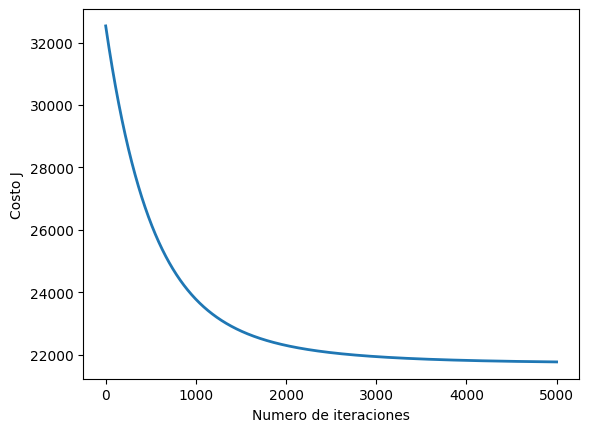

In [54]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(10)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para diferentes alimentos de la india conociendo sus caracteristicas por fecha
X_array = [1, 1, 10, 42, 51, 30.2, 80.2, 1, 18, 1]
X_array[1:10] = (X_array[1:10] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

In [31]:
X_array = [1, 1, 10, 42, 51, 30.2, 80.2, 1, 18, 1]
X_array[1:10] = (X_array[1:10] - mu) / sigma

In [32]:
X_array[1:10]

[-1.8345851984034187,
 -0.6932879468631983,
 -0.612711745672834,
 -0.5805132012463247,
 1.2429654372655772,
 0.006519485412921948,
 -0.8269698761209384,
 0.9019928441352111,
 -0.15521273405273303]

In [33]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [34]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para diferentes alimentos de la india conociendo sus caracteristicas por fecha

X_array = [1, 1, 10, 42, 51, 30.2, 80.2, 1, 18, 1]
price = np.dot(X_array, theta)

print('Estimar el precio para diferentes alimentos de la india conociendo sus caracteristicas por fecha (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Estimar el precio para diferentes alimentos de la india conociendo sus caracteristicas por fecha (usando la ecuación de la normal): $0
